#  Machine Learning project: Default of credit card clients (2021-2022)

Ce projet vise à resoudre le probleme des cartes de credits chez les banques , plus sepcifiquement de decider si un client est en defaut ou non à partir d'un ensmble de données.



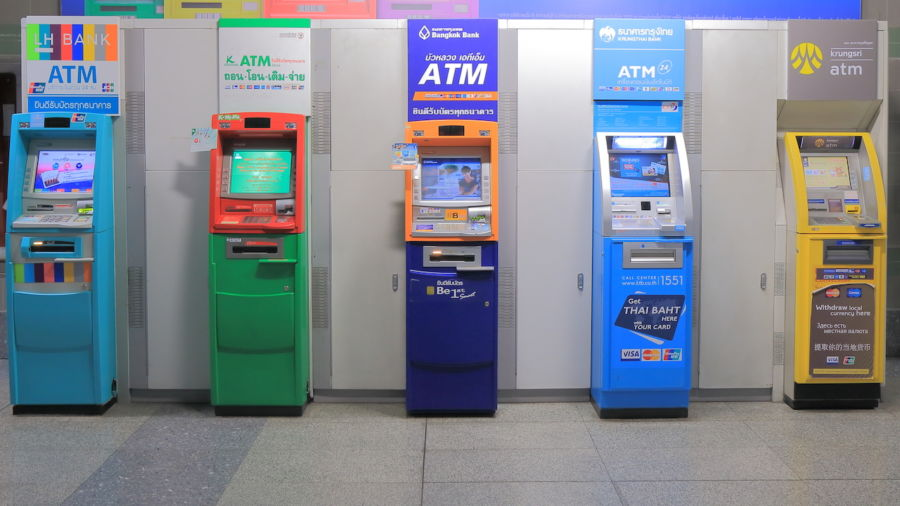

### Features

Features:
There are 25 features:

•ID: ID of each client  
•LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit    
•SEX: Gender (1=male, 2=female)  
•EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)  
•MARRIAGE: Marital status (1=married, 2=single, 3=others)  
•AGE: Age in years   
•PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)  
•PAY_2: Repayment status in August, 2005 (scale same as above)  
•PAY_3: Repayment status in July, 2005 (scale same as above)  
•PAY_4: Repayment status in June, 2005 (scale same as above)  
•PAY_5: Repayment status in May, 2005 (scale same as above)  
•PAY_6: Repayment status in April, 2005 (scale same as above)  
•BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)  
•BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)  
•BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)  
•BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)  
•BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)  
•BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)  
•PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)  
•PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)  
•PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)  
•PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)  
•PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)  
•PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)  
•default.payment.next.month: Default payment (1=yes, 0=no)  

## Chargemment des bibliothèques

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,confusion_matrix,mean_squared_error
from sklearn import metrics
from sklearn.pipeline import Pipeline
from google.colab import drive
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


## Description de la base

### Chargement de la base

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/My Drive/Data.csv')

### Generalités 

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
#data.shape
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 30000 rows and 25 columns


In [ ]:
data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

### Quelques modifications

In [ ]:
data.rename(columns={'default payment next month':'dpnm'}, inplace=True)
data.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [ ]:
print(np.unique(data['MARRIAGE']))

[0 1 2 3]


In [ ]:
print(np.unique(data['AGE'])) #de 21 à 79

[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 79]


In [ ]:
print(f'Unique values of Education columns are:',np.unique(data['EDUCATION']))

Unique values of Education columns are: [0 1 2 3 4 5 6]


In [ ]:
#cherche les nAn
data.isna().sum()

#pas de nAn

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dpnm         0
dtype: int64

### DEFAULT 

In [ ]:
data['dpnm'].value_counts()

0    23364
1     6636
Name: dpnm, dtype: int64

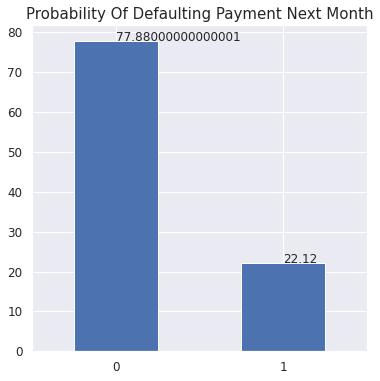

In [ ]:
def_cnt = (data.dpnm.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

#zip = fonction qui joint deux rangers

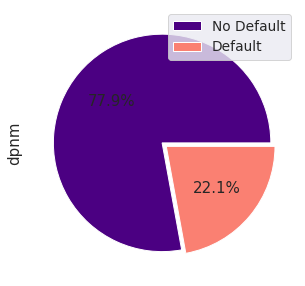

In [ ]:
plt.figure(figsize=(7,5))

data['dpnm'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['indigo','salmon'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No Default', 'Default'])
plt.show()

<frame  > La dataset n'est pas équilibré, le nombre de 0 (no default) dépasse le nombre de 1 (default).                                                               </frame>

### AGE 

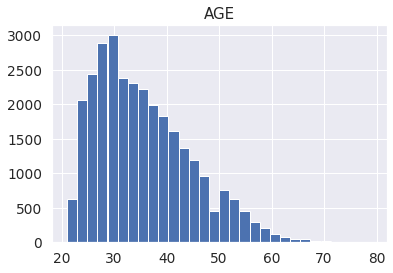

In [ ]:
data.hist(column='AGE',bins=30);
#data.hist(column='AGE', bins=30, orientation='horizontal' );

<frame  >
les clients qui sont entre 20 et 30 ans sont plus nombreux que les autres 
</frame> 

In [ ]:
data['AGE_BIN'] = pd.cut(data['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(data['AGE_BIN'].value_counts())

NameError: ignored

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  int64   
 1   LIMIT_BAL  30000 non-null  int64   
 2   SEX        30000 non-null  int64   
 3   EDUCATION  30000 non-null  int64   
 4   MARRIAGE   30000 non-null  int64   
 5   AGE        30000 non-null  int64   
 6   PAY_1      30000 non-null  int64   
 7   PAY_2      30000 non-null  int64   
 8   PAY_3      30000 non-null  int64   
 9   PAY_4      30000 non-null  int64   
 10  PAY_5      30000 non-null  int64   
 11  PAY_6      30000 non-null  int64   
 12  BILL_AMT1  30000 non-null  int64   
 13  BILL_AMT2  30000 non-null  int64   
 14  BILL_AMT3  30000 non-null  int64   
 15  BILL_AMT4  30000 non-null  int64   
 16  BILL_AMT5  30000 non-null  int64   
 17  BILL_AMT6  30000 non-null  int64   
 18  PAY_AMT1   30000 non-null  int64   
 19  PAY_AMT2   30000 non-null

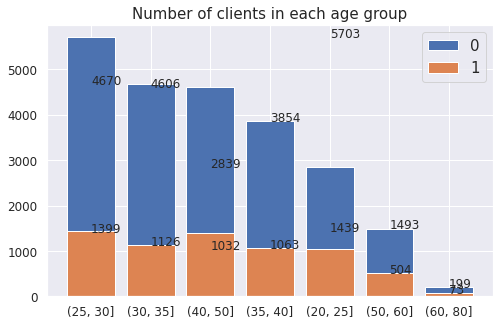

In [ ]:
bins = [20, 25, 30, 35, 40, 50, 60, 80]
names = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']
data['AGE_BIN'] = pd.cut(x=data.AGE, bins=bins, labels=names, right=True)

#age_cnt = data.AGE_BIN.value_counts()
age_0 = (data.AGE_BIN[data['dpnm'] == 0].value_counts()) #clients with no default payment
age_1 = (data.AGE_BIN[data['dpnm'] == 1].value_counts()) #clients with default payment

plt.subplots(figsize=(8,5))
# sns.barplot(data=data, x='AGE_BIN', y='LIMIT_BAL', hue='dpnm', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

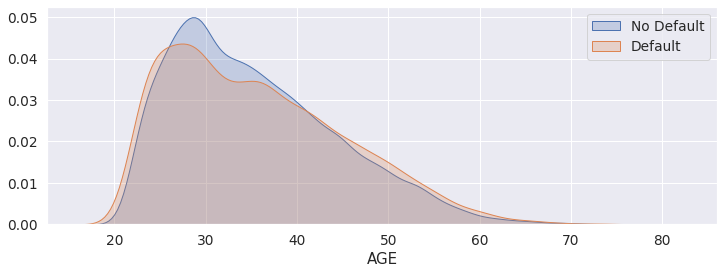

In [ ]:
plt.figure(figsize=(12,4))

sns.kdeplot(data.loc[(data['dpnm'] == 0), 'AGE'], label = 'No Default', shade = True)
sns.kdeplot(data.loc[(data['dpnm'] == 1), 'AGE'], label = 'Default', shade = True )
plt.ylabel('')
plt.legend()
plt.show()

#densité 

<frame  >
Les clients qui sont entre 25 ans et 40 ans sont plus suceptibles d'avoir un paiement sans défaut le mois prochain
</frame> 

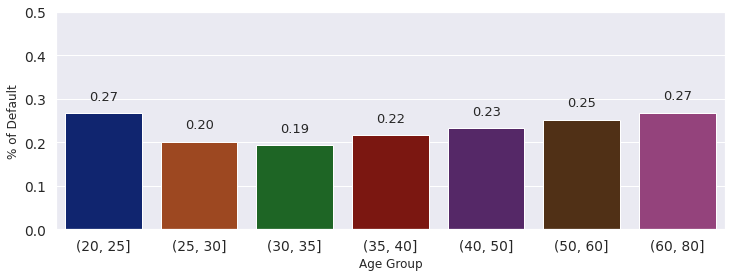

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "AGE_BIN", y = "dpnm", data = data, palette = 'dark', ci = None, order = names)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

<frame>
les probabilités de défaut les plus faibles sont chez les clients entre 25 et 35 ans.
Alors que les probabilités de défaut les plus élevés sont chez les clients entre 20 et 25 ans mais aussi ceux de 60 ans ou plus 
</frame>

### SEX

In [ ]:
data.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

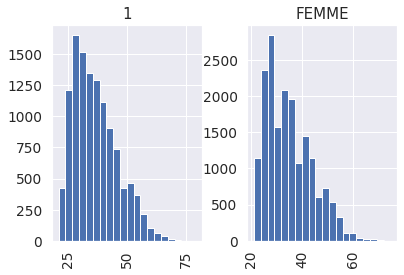

In [ ]:
import matplotlib.pyplot as plt
#data['AGE'].plot.kde();
#histogrammes de l'âge selon le sexe
data.hist(column='AGE',by='SEX',bins=20);
plt.title('FEMME');

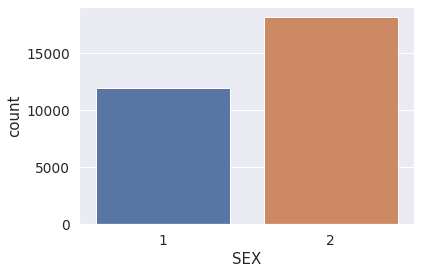

In [ ]:
sns.countplot(x='SEX', data=data)
plt.show()

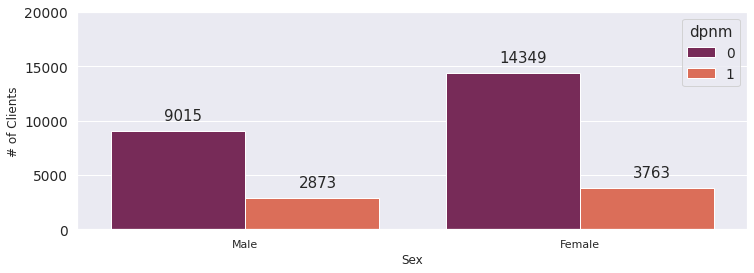

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = data, x = 'SEX', hue="dpnm", palette = 'rocket')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

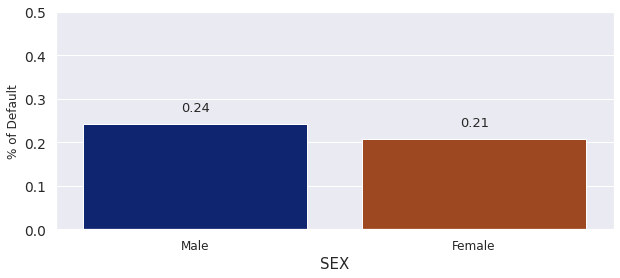

In [ ]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "SEX", y = "dpnm", data = data, palette = 'dark', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()

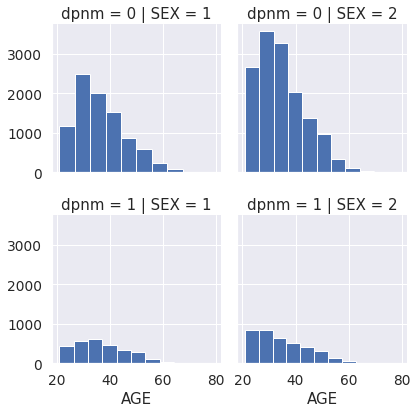

In [ ]:
g = sns.FacetGrid(data, row='dpnm', col='SEX')
g = g.map(plt.hist, 'AGE')

<frame>
On peut voir que les femmes du groupe d'âge 20-30 ont une tendance très élevée aux défauts de paiement par rapport aux hommes de toutes les tranches d'âge.

Par conséquent, nous pouvons conserver la colonne SEXE des clients pour prédire la probabilité de défaut de paiement.


</frame>

### MARRIAGE

In [ ]:
# (1=married, 2=single, 3=others)
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

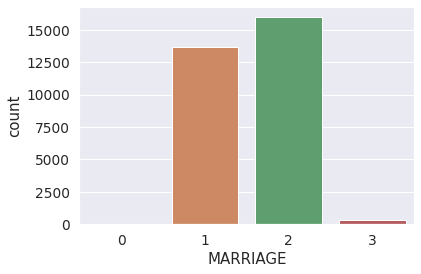

In [ ]:
sns.countplot(x='MARRIAGE', data=data)
plt.show()

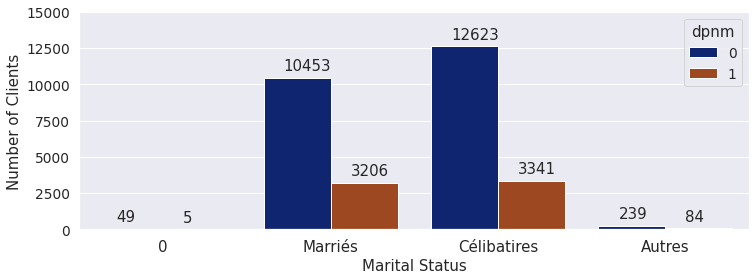

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = data, x = 'MARRIAGE', hue="dpnm", palette = 'dark')

plt.xlabel("Marital Status", fontsize= 15)
plt.ylabel("Number of Clients", fontsize= 15)
plt.ylim(0,15000)
plt.xticks([0,1,2,3],['0','Marriés', 'Célibatires', 'Autres'], fontsize = 15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))
plt.show()

=> On remarque ici que la valeur 0 n'a aucune signification (à supprimer)

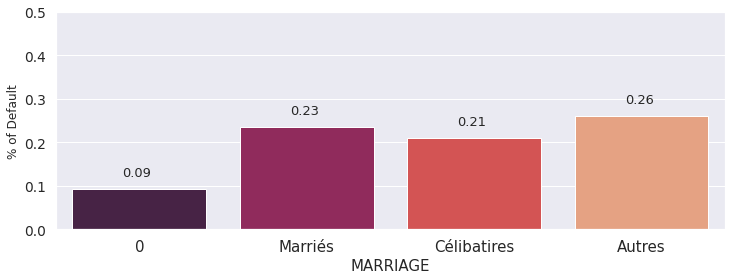

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "MARRIAGE", y = "dpnm", data = data, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['0','Marriés', 'Célibatires', 'Autres'], fontsize = 15)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

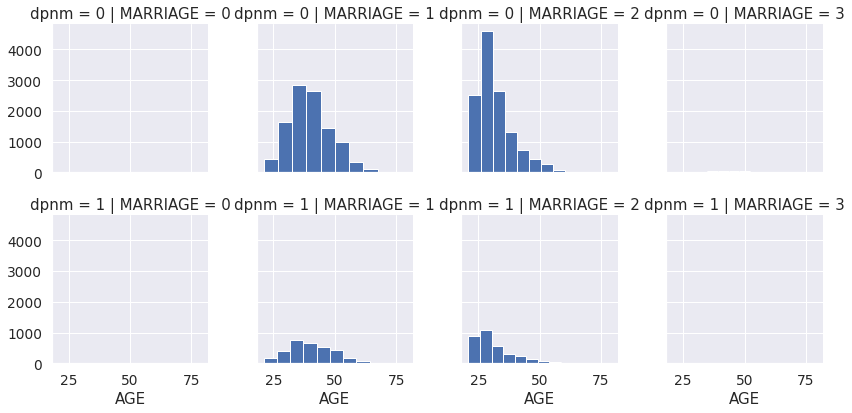

1=MARRIE, 2=CELIBATAIRE, 3=AUTRES


In [ ]:
g = sns.FacetGrid(data, row='dpnm', col='MARRIAGE')#pour visualiser la distribution de la variable dpnm avec d'autres sous-ensembles
g = g.map(plt.hist, 'AGE')
plt.show()

print("1=MARRIE, 2=CELIBATAIRE, 3=AUTRES");

<frame> 
On remarque que les personnes mariées entre 30 et 50 ans ainsi que les célibataires de 20 à 30 ans ont tendance à faire défaut de paiement.


Les clients non mariés ont une probabilité plus élevé de défaut de paiement.

=> Par conséquent, nous pouvons inclure la fonction MARRIAGE des clients pour trouver la probabilté de défaut de paiement. 


</frame>

### EDUCATION


EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

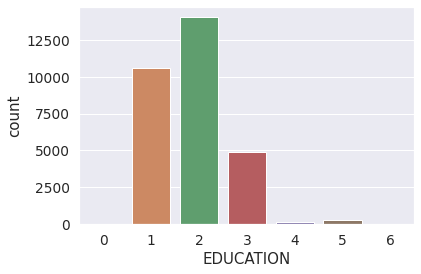

In [ ]:
sns.countplot(x='EDUCATION', data=data)
plt.show()

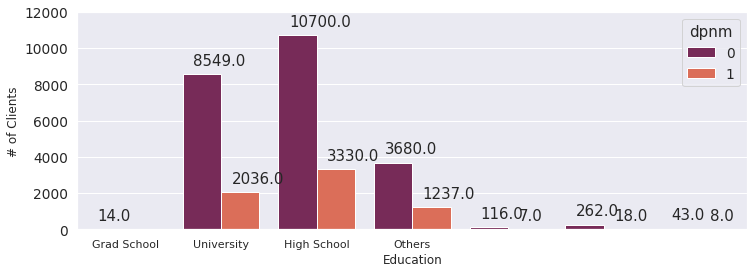

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = data, x = 'EDUCATION', hue="dpnm", palette = 'rocket')

plt.xlabel("Education", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3],['Grad School','University','High School','Others'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

plt.show()

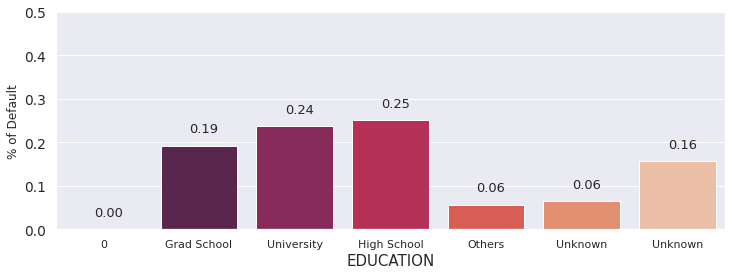

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "EDUCATION", y = "dpnm", data = data, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3,4,5,6],['0','Grad School','University','High School','Others','Unknown','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

<frame>
Le niveau d'éducation prédominant dans notre ensemble de données est :

1-« Université »

2-« École supérieure »

3-« Lycée »

4-« Autres »


En ne considérant que les trois premiers niveaux, il semble qu'une éducation supérieure "Grad School" se traduise par une moindre chance d'échec.

Cependant, le niveau « Autres » (dont nous présumons que cela signifie un niveau inférieur à celui du secondaire), ont une probabilité sensiblement plus faible.


</frame>

### PAIEMENT


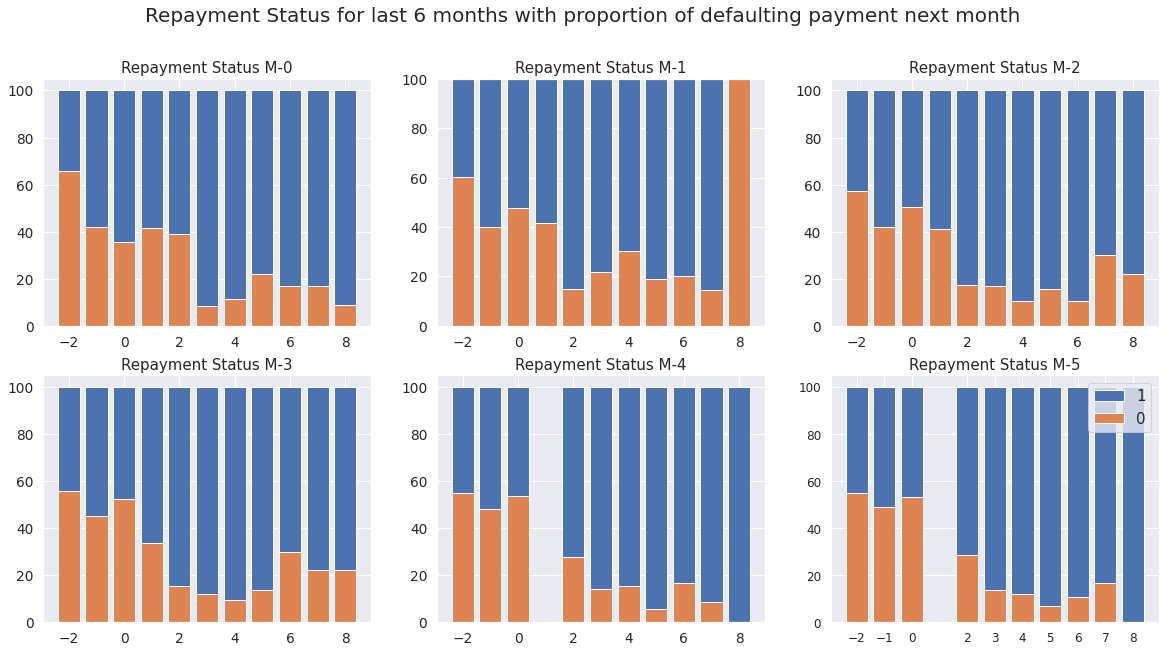

In [ ]:
 #payment next month is decreasing. Hence we can see that Age is important feature to predict the default payment for next month.
plt.subplots(figsize=(20,10))

ind = sorted(data.PAY_1.unique())
pay_0 = (data.PAY_1[data['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (data.PAY_1[data['dpnm'] == 1].value_counts(normalize=True))
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(231)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-0", fontsize=15)

ind = sorted(data.PAY_2.unique())
pay_0 = (data.PAY_2[data['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (data.PAY_2[data['dpnm'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(232)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-1", fontsize=15)

ind = sorted(data.PAY_3.unique())
pay_0 = (data.PAY_3[data['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (data.PAY_3[data['dpnm'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(233)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-2", fontsize=15)

ind = sorted(data.PAY_4.unique())
pay_0 = (data.PAY_4[data['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (data.PAY_4[data['dpnm'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(234)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-3", fontsize=15)

ind = sorted(data.PAY_5.unique())
pay_0 = (data.PAY_5[data['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (data.PAY_5[data['dpnm'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(235)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-4", fontsize=15)

ind = sorted(data.PAY_6.unique())
pay_0 = (data.PAY_6[data['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (data.PAY_6[data['dpnm'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(236)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-5", fontsize=15)

plt.xticks(ind, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20)

plt.show()

<frame>
Le graphique ci-dessus nous montre la proportion des clients qui feront des défauts de paiement le mois prochain en fonction de l'historique de remboursement.

=>Pour le statut du mois en cours, plus le paiement est effectué tôt, moins il y a de chances que ces clients fassent un défaut de paiement.

</frame>

<frame>
Nous allons maintenant vérifier si le montant de la facture des six derniers mois affectera ou non le défaut de paiement le mois prochain :
</frame>

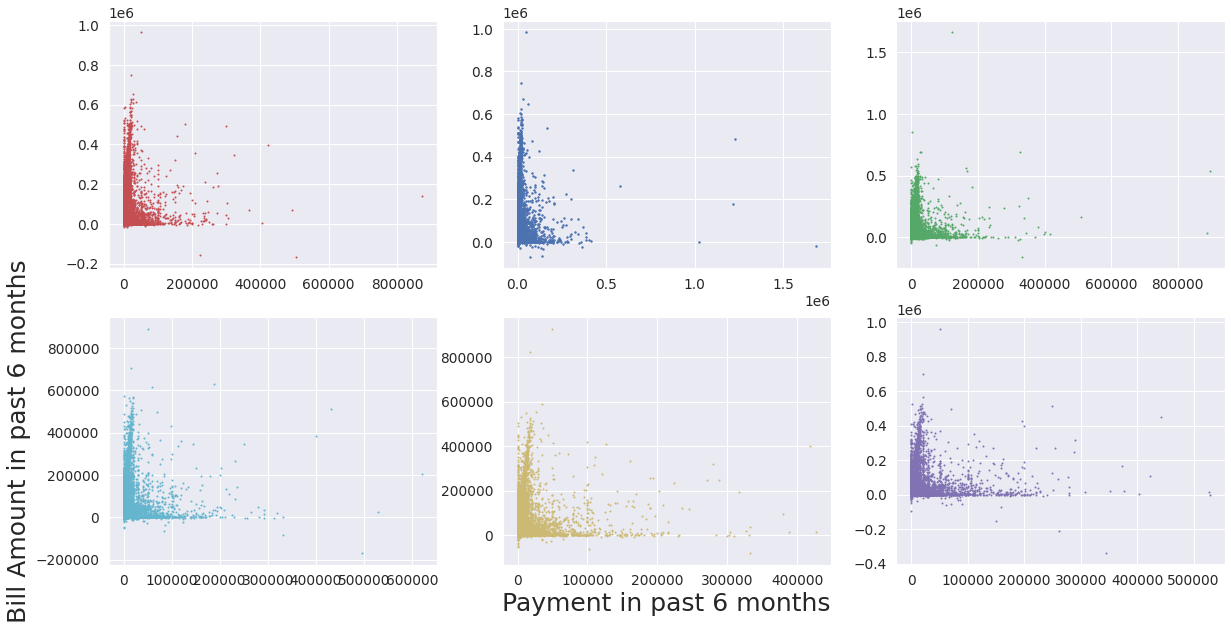

In [ ]:
plt.subplots(figsize=(20,10))

plt.subplot(2,3,1)#2 lignes, 3 colonnes et index=1
plt.scatter(x=data.PAY_AMT1, y=data.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=data.PAY_AMT2, y=data.BILL_AMT2, c='b', s=2)

plt.subplot(233)
plt.scatter(x=data.PAY_AMT3, y=data.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=data.PAY_AMT4, y=data.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=data.PAY_AMT5, y=data.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=data.PAY_AMT6, y=data.BILL_AMT6, c='m', s=1)

plt.show()

<frame>
Le graphique ci-dessus indique qu'il y a une proportion plus élevée de clients pour lesquels le montant de la facture est élevé mais le paiement effectué contre celui-ci est très faible.

Le nombre maximum de points de données est étroitement emballé le long de l'axe Y près de 0 sur l'axe X.



</frame>

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
La seule  chose que j'ai pu conclure c'est que la categorie unknown a une chance moins elevée de defaut

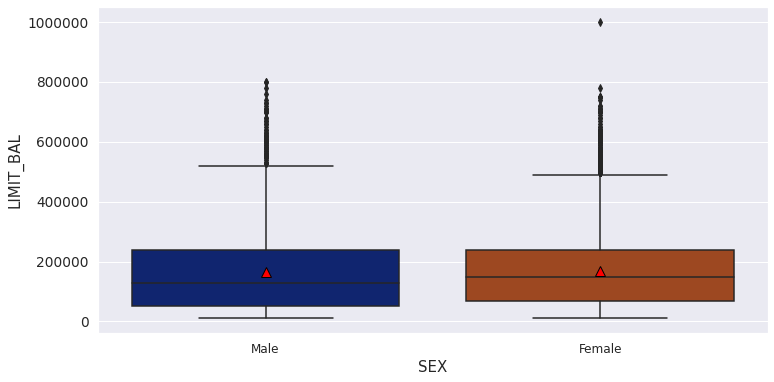

In [ ]:
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']
plt.figure(figsize=(12,6))

sns.boxplot(x = "SEX", y = "LIMIT_BAL",data = data, palette = 'dark', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

plt.show()

In [ ]:
data.groupby('EDUCATION')['LIMIT_BAL'].mean()

EDUCATION
0    217142.857143
1    212956.069910
2    147062.437634
3    126550.270490
4    220894.308943
5    168164.285714
6    148235.294118
Name: LIMIT_BAL, dtype: float64

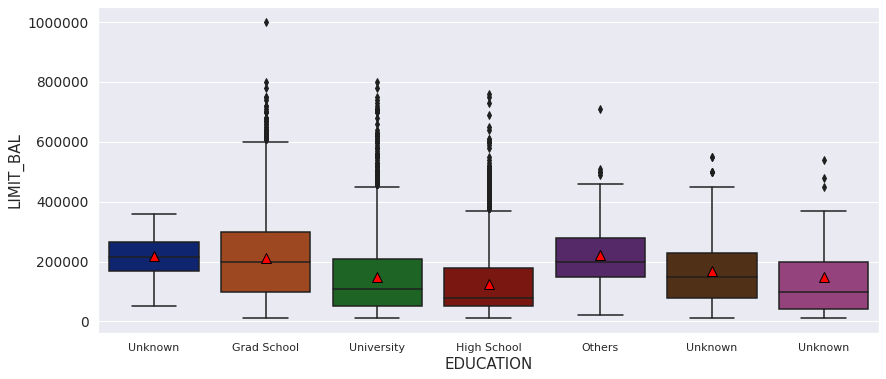

EDUCATION
0    217142.857143
1    212956.069910
2    147062.437634
3    126550.270490
4    220894.308943
5    168164.285714
6    148235.294118
Name: LIMIT_BAL, dtype: float64

In [ ]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", data = data, palette = 'dark', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3,4,5,6],['Unknown','Grad School','University','High School','Others','Unknown','Unknown'], fontsize = 11)

plt.show()


data.groupby('EDUCATION')['LIMIT_BAL'].mean()

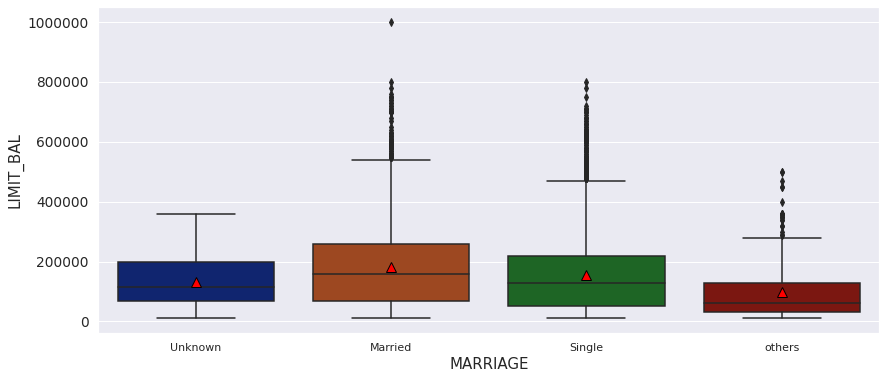

In [ ]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", data = data, palette = 'dark', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'others'], fontsize = 11)

plt.show()


In [ ]:
data.groupby('AGE_BIN')['LIMIT_BAL'].mean()


AGE_BIN
(20, 25]     73763.885301
(25, 30]    164320.918510
(30, 35]    197688.060732
(35, 40]    196780.557250
(40, 50]    179680.213156
(50, 60]    159349.023535
(60, 80]    201617.647059
Name: LIMIT_BAL, dtype: float64

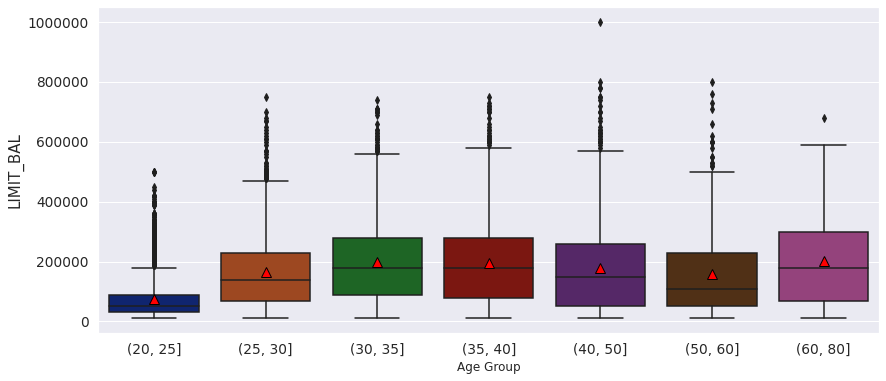

In [ ]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "AGE_BIN", y = "LIMIT_BAL",data = data, palette = 'dark', order = AgeBin_order, showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xlabel("Age Group", fontsize= 12)

plt.show()

En general, la limite de crédit offerte correspends à la capacité de payer sans delais dans toutes les catégorie. 
La seule exception est les catégories inconnues, qui présentent des risques de default plus faibles.

### CORRELATION


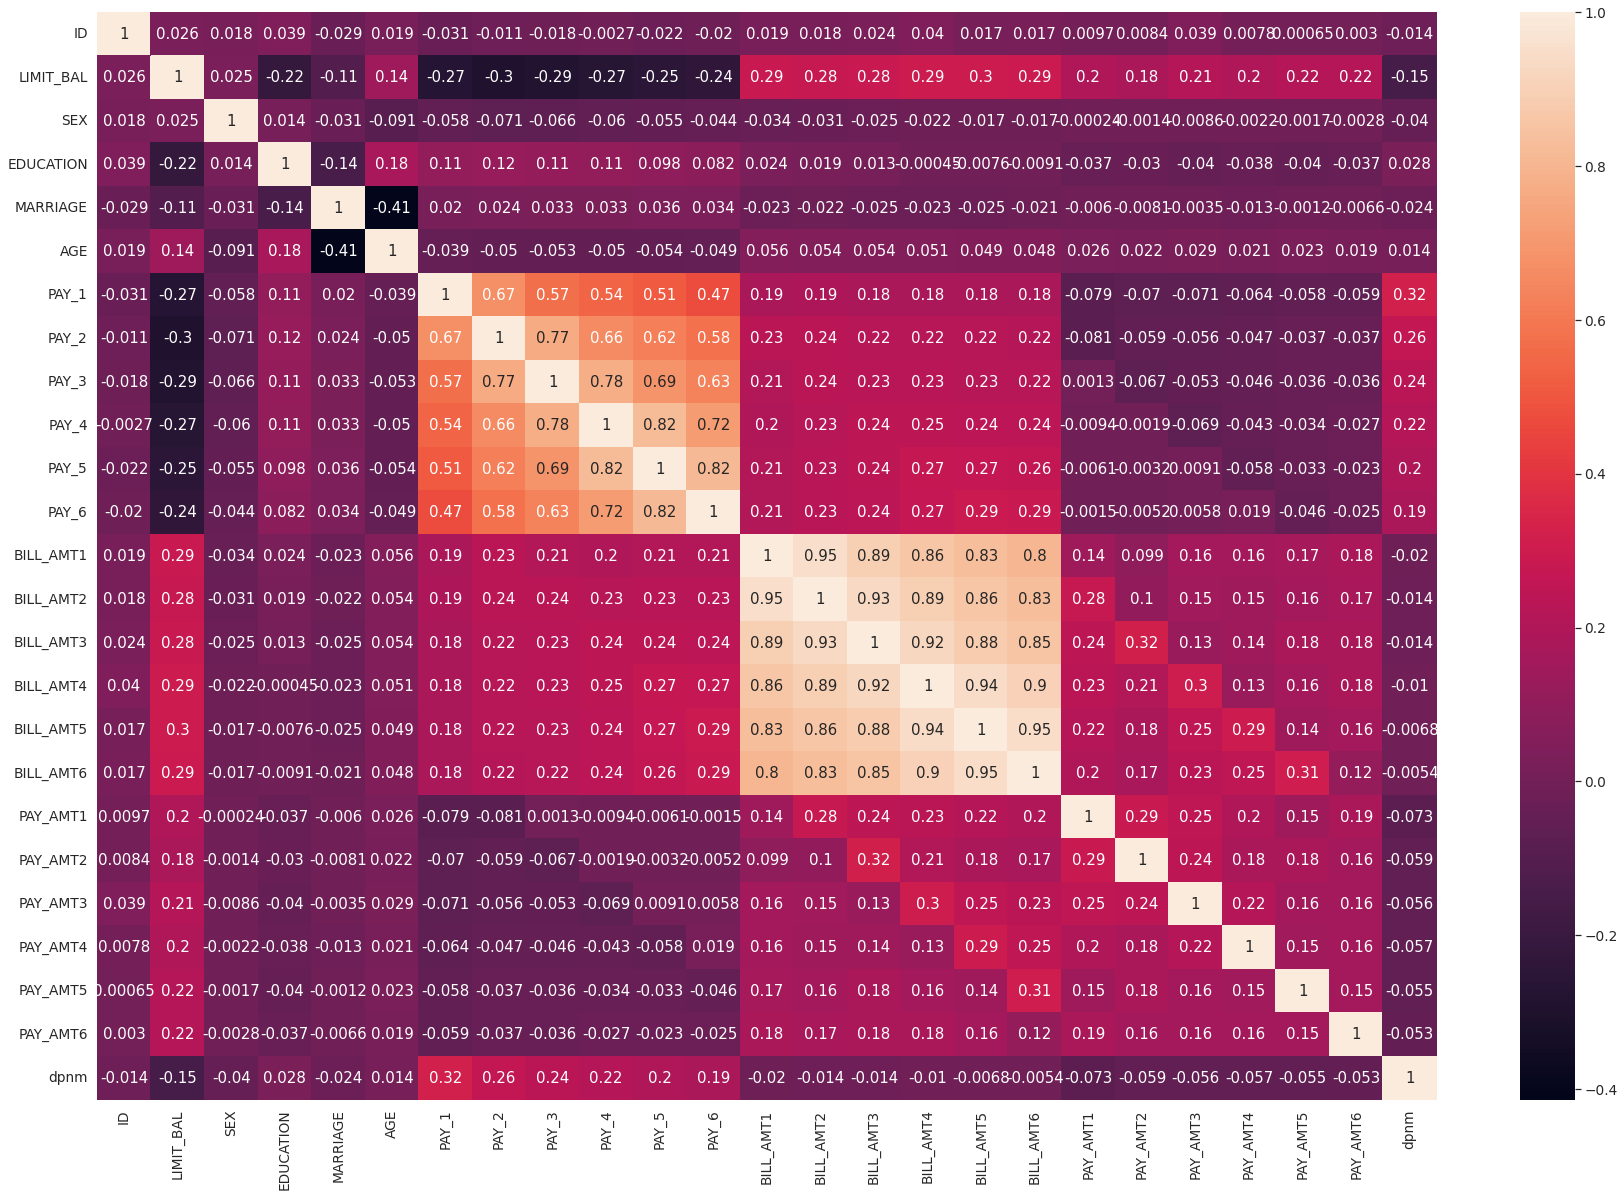

In [ ]:
plt.subplots(figsize=(30,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

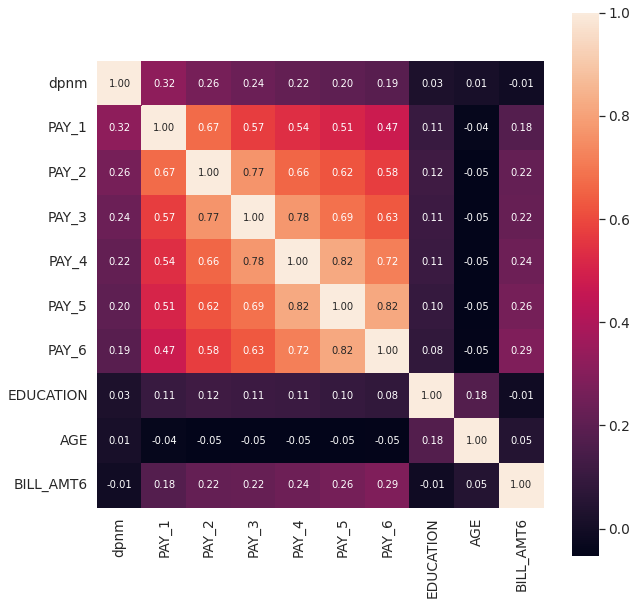

In [ ]:
k = 10 #number of variables for heatmap
corrmat = data.corr()
cols = corrmat.nlargest(k, 'dpnm')['dpnm'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<frame>
Comme nous pouvons le voir, la prédiction par défaut du mois prochain dépend du statut de remboursement des six derniers mois de toutes les fonctionnalités qui nous sont données.

Mais il existe une multicolinéarité entre les fonctionnalités du statut de remboursement


Nous allons d'abord entraîner le modèle avec toutes les fonctionnalités et essayer de réduire les fonctionnalités non importantes.
</frame>

## Preparation des données

In [ ]:
#fonction pour supprimer les données qui se répétent 
def My_function(data_c):
    list_results = list()
    for i, row in data_c.iterrows():
        items = row[6:12].tolist()
        a_set = set(items)
        number_of_unique_values = len(a_set)
        if (number_of_unique_values>2):
            list_results.append(i)      
    
    for l in list_results:
        data_c.drop(l, inplace=True )
    return data_c


In [ ]:

data = My_function(data)

#regrouper les PAY
#df_concat = pd.concat((data['PAY_1'], data['PAY_2'] ,data['PAY_3'], data['PAY_4'], data['PAY_5'], data['PAY_6']))
#by_row_index = df_concat.groupby(df_concat.index)
#data['pay_x'] = by_row_index.mean()
pay_x = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

#faire une nouvelle colonne qui prend :
#0 => pour les clients qui paient à temps 
#1 => pour les clients qui paient en retard 
#2 => les autres 
data['Status'] =  np.where((data['PAY_1']<=0) & (data['PAY_2']<=0) & (data['PAY_3']<=0) & (data['PAY_4']<=0) & (data['PAY_5']<=0) & (data['PAY_6']<=0) ,0,2)
data.loc[(data['PAY_1']!=-1) & (data['PAY_2']!=-1) & (data['PAY_3']!=-1) & (data['PAY_4']!=-1) & (data['PAY_5']!=-1) & (data['PAY_6']!=-1) ,'Status']=1

data.shape

NameError: ignored

In [ ]:
data.loc[:,'EDUCATION'] = data.loc[:,'EDUCATION'].replace(0,5)

In [ ]:
data=data[data['EDUCATION'] <=4]
data=data[data['EDUCATION'] >=1]

In [ ]:
data=data[data['MARRIAGE'] >0]

In [ ]:
data.shape

(24579, 27)

In [ ]:
data.dpnm.value_counts()

0    19662
1     4917
Name: dpnm, dtype: int64

In [ ]:
#w is the function which we will use to measure the fitness of the model. The function contains metrics like Accuracy, Precision, Recall and F1 Score. It also calcualtes the GINI and AUC of the model and throws us the Feature Importance as per the respective model (only if the particular Machine Learning algorithm allows to do so)

def model_fit_reports(algo,X_,y_,performCV=True,printFeatureImportance=True, cv_folds=5):
    
    #Accuracy, Precision, Recall, F1 Score
    pred = algo.predict(X_)
    accu = accuracy_score(y_, pred)
    f1_  = f1_score(y_, pred)
    rec  = recall_score(y_, pred)
    prec = precision_score(y_, pred)

    
    #GINI & AUC
    fpr, tpr, thresholds = roc_curve(y_, pred)
    roc_auc = auc(fpr, tpr)
    Gini   = 2*roc_auc - 1   
    labels  = ['Accuracy','F1 Score', 'Recall', 'Precision', 'Gini', 'AUC']
    values  = [accu,f1_,rec,prec,Gini,roc_auc]
    
    all_    = pd.Series(values,labels)  
    print(all_)
    all_.plot(kind='bar', title='Model Fit Report')   


    if performCV:
        cv_score = cross_val_score(algo, X_, y_, cv=cv_folds, scoring='roc_auc')
        GINI     = 2 * cv_score -1
        print("AUC : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        print("GINI : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(GINI),np.std(GINI),np.min(GINI),np.max(GINI)))

    cols = list(X_.columns)
    if printFeatureImportance:
        feat_imp = pd.Series(algo.feature_importances_, cols).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')    
    
    return all_

## Les modeles

### LOGISTIC REGRESSION

#### ESSAIE 1

In [ ]:
X = data.drop(['dpnm','AGE_BIN'], axis=1)
y = data.dpnm

In [ ]:
print(X.shape)
print(y.shape)

(24579, 25)
(24579,)


In [ ]:
X.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Status
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,1
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10,stratify = y)
#avec stratify

In [ ]:
model1 = LogisticRegression(random_state=10)
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

#print(classification_report(y_pred, y_test,digits=6))
#print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model1: ', accuracy_score(y_pred,y_test))


Accuracy Score for model1:  0.8


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4916
           1       0.00      0.00      0.00      1229

    accuracy                           0.80      6145
   macro avg       0.40      0.50      0.44      6145
weighted avg       0.64      0.80      0.71      6145



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

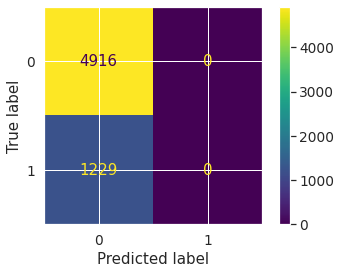

In [ ]:
print(metrics.classification_report(y_test, y_pred, labels = [0, 1]))
plot_confusion_matrix(model1,X_test,y_test)

<frame>
Nous évaluons maintenant en supprimant les variables de multicolinéarité et en ne conservant que la variable PAY_1
</frame>

#### ESSAIE 2 (supprimer les variables de multicolinéarité)

In [ ]:
X = data.drop(['dpnm','AGE_BIN','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], axis=1)
y = data.dpnm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10,stratify = y)
#avec stratify

In [ ]:
model2 = LogisticRegression(random_state=10)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

#print(classification_report(y_pred, y_test,digits=6))
#print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model2: ', accuracy_score(y_pred2,y_test))


Accuracy Score for model2:  0.8


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4916
           1       0.00      0.00      0.00      1229

    accuracy                           0.80      6145
   macro avg       0.40      0.50      0.44      6145
weighted avg       0.64      0.80      0.71      6145



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

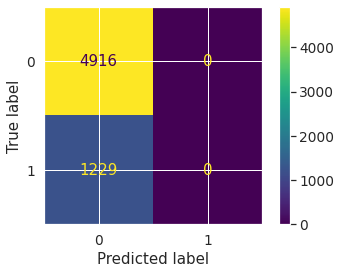

In [ ]:
print(metrics.classification_report(y_test, y_pred2, labels = [0, 1]))
plot_confusion_matrix(model2,X_test,y_test)

In [ ]:
y_score=model2.predict_proba(X_test)
print(y_score)
fpr,tpr,theshold=roc_curve(y_test,y_score[:,1]) #: => toutes les lignes / theshold= seuil /fpr et tpr= false/true positive rate
roc_auc=auc(fpr,tpr)

[[0.86561849 0.13438151]
 [0.76156292 0.23843708]
 [0.65359455 0.34640545]
 ...
 [0.95741731 0.04258269]
 [0.62403246 0.37596754]
 [0.76119349 0.23880651]]


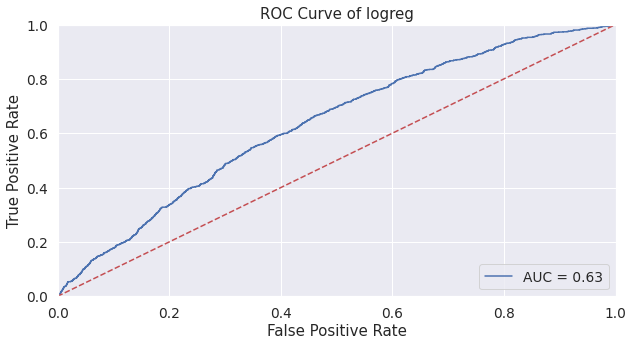

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of logreg')
plt.grid(True)
plt.show()

<frame>
Comme nous pouvons le voir, même maintenant,l'accuracy ne change pas (0.8)
</frame>

#### ESSAIE 3

In [ ]:
X = data[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']]
y = data.dpnm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10,stratify = y)
#avec stratify

In [ ]:
model3 = LogisticRegression(random_state=10)
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)
y_train_pred = model3.predict(X_train)

#print(classification_report(y_pred, y_test,digits=6))
#print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model3: ', accuracy_score(y_pred3,y_test))
#print('\nTrain Accuracy Score for model4: ', accuracy_score(y_train_pred,y_train))


Test Accuracy Score for model3:  0.8


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4916
           1       0.00      0.00      0.00      1229

    accuracy                           0.80      6145
   macro avg       0.40      0.50      0.44      6145
weighted avg       0.64      0.80      0.71      6145



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

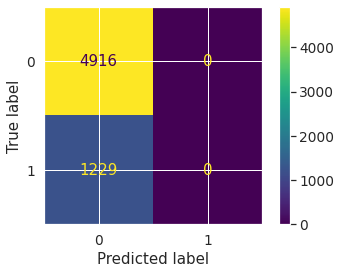

In [ ]:
print(metrics.classification_report(y_test, y_pred3, labels = [0, 1]))
plot_confusion_matrix(model3,X_test,y_test)

=> l'accuracy ne change toujours pas 

#### ESSAIE 4 

In [ ]:
regressor = LogisticRegression(random_state =10, solver='sag', max_iter = 10**2)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(random_state=10, solver='sag')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Accuracy     0.797884
F1 Score     0.012719
Recall       0.006509
Precision    0.275862
Gini         0.002238
AUC          0.501119
dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


AUC : Mean - 0.5238283 | Std - 0.01718387 | Min - 0.4997581 | Max - 0.5423128
GINI : Mean - 0.04765662 | Std - 0.03436775 | Min - -0.000483835 | Max - 0.08462563


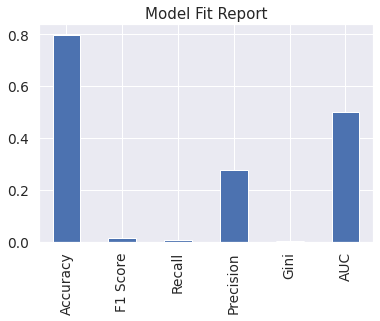

In [ ]:
test  = model_fit_reports(algo =regressor ,X_ = X_test,y_ = y_test, performCV=True, printFeatureImportance=False, cv_folds=5)

=> l'accuracy ne change toujours pas

### Decison Tree 

In [ ]:
dt = Pipeline(steps=[('decisionTree', DecisionTreeClassifier(random_state=0))])

In [ ]:
X = data.drop(['dpnm','AGE_BIN'], axis=1)
y = data.dpnm
#

In [ ]:
print(X.shape)
print(y.shape)
#

(24579, 25)
(24579,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,stratify = y)
#avec stratify
#

In [ ]:
dt.fit(X_train,y_train)
print("Score du modèle : %.2f" % dt.score(X_test, y_test))
y_pred = dt.predict(X_test)

Score du modèle : 0.75


              precision    recall  f1-score   support

           0   0.853082  0.836249  0.844581      4916
           1   0.392911  0.423922  0.407828      1229

    accuracy                       0.753784      6145
   macro avg   0.622996  0.630085  0.626205      6145
weighted avg   0.761047  0.753784  0.757231      6145



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


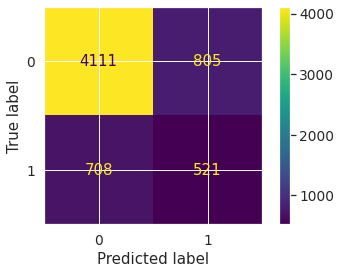

In [ ]:
#Evaluate the model using accuracy and confusion matrix
plot_confusion_matrix(dt,X_test,y_test)
print(classification_report(y_test,y_pred,digits=6))

In [ ]:
y_score=dt.predict_proba(X_test)
print(y_score)
fpr,tpr,theshold=roc_curve(y_test,y_score[:,1]) #: => toutes les lignes / theshold= seuil /fpr et tpr= false/true positive rate
roc_auc=auc(fpr,tpr)


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


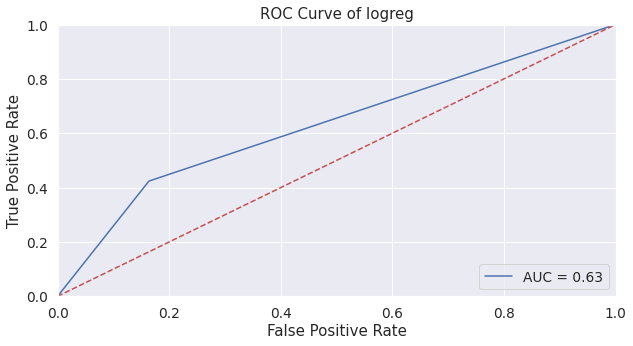

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of logreg')
plt.grid(True)
plt.show()

### RANDOM FOREST 

In [ ]:
pay_x = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
data['pay_x']= data[pay_x].mean(axis=1)


In [ ]:
data.info()

In [ ]:
X = data.drop(['dpnm','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','AGE_BIN'], axis=1)
y = data.dpnm

In [ ]:
print(X.shape)
print(y.shape)

(24579, 21)
(24579,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,stratify = y)
#avec stratify

In [ ]:
rfc = Pipeline(steps=[('RandomForestClassifier', RandomForestClassifier(random_state=0))])

In [ ]:
rfc.fit(X_train,y_train)
print("Score du modèle : %.2f" % rfc.score(X_test, y_test))
y_pred2 = rfc.predict(X_test)

Score du modèle : 0.84


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0   0.861243  0.958299  0.907183      4916
           1   0.696296  0.382425  0.493697      1229

    accuracy                       0.843124      6145
   macro avg   0.778770  0.670362  0.700440      6145
weighted avg   0.828254  0.843124  0.824486      6145



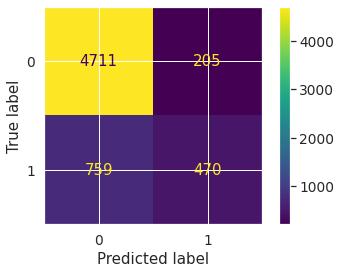

In [ ]:
plot_confusion_matrix(rfc,X_test,y_test)
print(classification_report(y_test,y_pred2,digits=6))

On change quelques paramètres 

In [ ]:
param_r = {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 19, 'min_samples_split': 18}


In [ ]:
rfc_s = RandomForestClassifier(**param_r,random_state = 42).fit(X_train,y_train)


In [ ]:
y_predRfc = rfc_s.predict(X_test)

Score du modèle : 0.84
              precision    recall  f1-score   support

           0   0.860029  0.961147  0.907781      4916
           1   0.706605  0.374288  0.489362      1229

    accuracy                       0.843775      6145
   macro avg   0.783317  0.667718  0.698571      6145
weighted avg   0.829344  0.843775  0.824097      6145



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


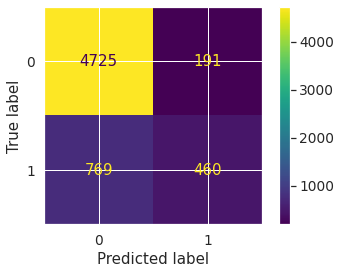

In [ ]:
print("Score du modèle : %.2f" % rfc_s.score(X_test, y_test))
plot_confusion_matrix(rfc_s,X_test,y_test)
print(classification_report(y_test,y_predRfc,digits=6))

In [ ]:
rfc2= RandomForestClassifier(random_state=8, n_estimators=500)
rfc2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=8)

Accuracy     0.846054
F1 Score     0.505747
Recall       0.393816
Precision    0.706569
Gini         0.352929
AUC          0.676465
dtype: float64
AUC : Mean - 0.7566941 | Std - 0.02333369 | Min - 0.7277105 | Max - 0.7917704
GINI : Mean - 0.5133883 | Std - 0.04666739 | Min - 0.455421 | Max - 0.5835407


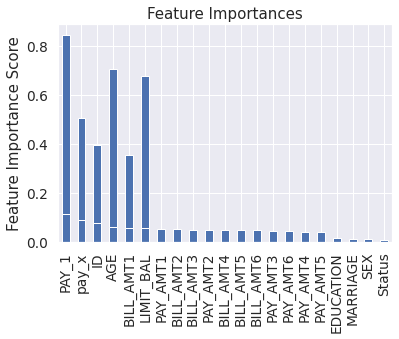

In [ ]:
test = model_fit_reports(algo =rfc2 ,X_ = X_test,y_ = y_test, performCV=True, printFeatureImportance=True, cv_folds=5)

In [ ]:
X = data.drop(['dpnm','EDUCATION','MARRIAGE','SEX','Status','AGE_BIN','pay_x'], axis=1)
y = data.dpnm

In [ ]:
print(X.shape)
print(y.shape)

(24579, 21)
(24579,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,stratify = y)
#avec stratify

In [ ]:
rfc2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=8)

Accuracy     0.844426
F1 Score     0.503119
Recall       0.393816
Precision    0.696403
Gini         0.350895
AUC          0.675448
dtype: float64
AUC : Mean - 0.7505382 | Std - 0.02277585 | Min - 0.7224979 | Max - 0.7841857
GINI : Mean - 0.5010764 | Std - 0.04555171 | Min - 0.4449958 | Max - 0.5683715


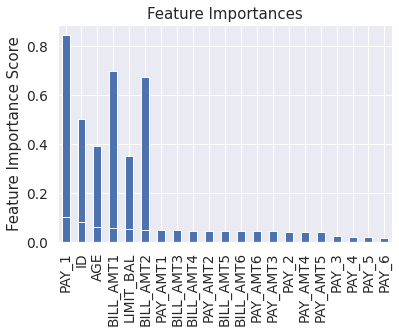

In [ ]:
test = model_fit_reports(algo =rfc2 ,X_ = X_test,y_ = y_test, performCV=True, printFeatureImportance=True, cv_folds=5)

### Adaboost

In [ ]:
ab = Pipeline(steps=[('AdaBoostClassifier', AdaBoostClassifier(random_state=0))])

In [ ]:
ab.fit(X_train,y_train)
print("Score du modèle : %.2f" % ab.score(X_test, y_test))
y_pred6 = ab.predict(X_test)

Score du modèle : 0.84


              precision    recall  f1-score   support

           0   0.854264  0.965826  0.906626      4916
           1   0.713799  0.340928  0.461454      1229

    accuracy                       0.840846      6145
   macro avg   0.784032  0.653377  0.684040      6145
weighted avg   0.826171  0.840846  0.817591      6145



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


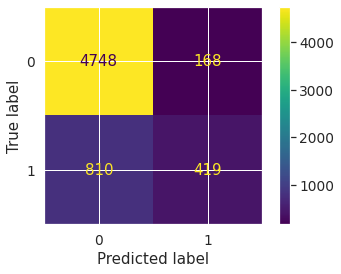

In [ ]:
plot_confusion_matrix(ab,X_test,y_test)
print(classification_report(y_test,y_pred6,digits=6))

In [ ]:
y_score=ab.predict_proba(X_test)
print(y_score)
fpr,tpr,theshold=roc_curve(y_test,y_score[:,1]) #: => toutes les lignes / theshold= seuil /fpr et tpr= false/true positive rate
roc_auc=auc(fpr,tpr)

[[0.50678    0.49322   ]
 [0.51161891 0.48838109]
 [0.49283474 0.50716526]
 ...
 [0.51039517 0.48960483]
 [0.51097545 0.48902455]
 [0.49234965 0.50765035]]


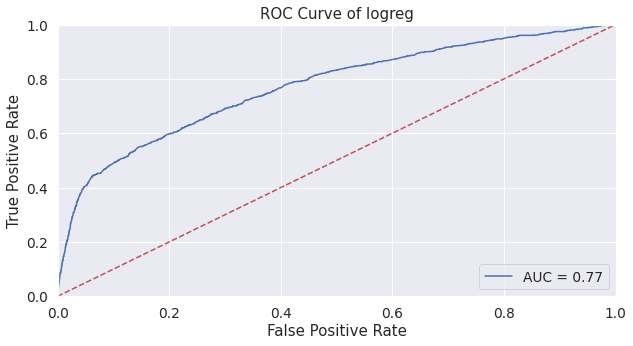

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of logreg')
plt.grid(True)
plt.show()

### Catboost - Ensemble methods

In [ ]:
!pip3 install catboost

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cb = Pipeline(steps=[('CatBoostClassifier', CatBoostClassifier(random_state=20))])

In [ ]:
X = data.drop(['dpnm','AGE_BIN','pay_x'], axis=1)
y = data.dpnm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,stratify = y)
#avec stratify

In [ ]:
cb.fit(X_train,y_train) 
print("Score du modèle : %.2f" % cb.score(X_test, y_test))
y_pred4 = cb.predict(X_test)

In [ ]:
import time

base=time.time()
y_pred4 = cb.predict(X_test)


h=time.time()-base
print(h)

0.03769350051879883


recall = TP /  (TP + FN)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



              precision    recall  f1-score   support

           0   0.862333  0.960740  0.908881      4916
           1   0.711078  0.386493  0.500791      1229

    accuracy                       0.845891      6145
   macro avg   0.786706  0.673617  0.704836      6145
weighted avg   0.832082  0.845891  0.827263      6145



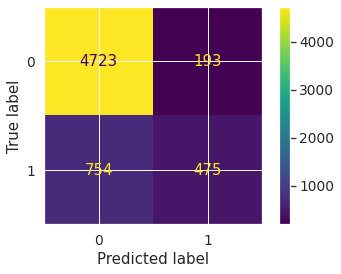

In [ ]:
plot_confusion_matrix(cb,X_test,y_test)
print(classification_report(y_test,y_pred4,digits=6))

•Class 0 a 96% recall quand a Class 1 a seulement 38%  recall rate
Ceci confirme l'hypothese qu'on devra peut etre ameliorer notre data preprocessing a fin d'ameliorer les resultats de la Classe 1.
•D'autre part,ce modèle a donné la meilleure précision jusqu'à présent 85%, de plus ce modelele est tres pratique au niveau de ressources , ça prends 0.03 secondes pour s'executer.      
Ces qualités sont comformes aux exigences  du domaine indistruel.



In [ ]:
y_score=cb.predict_proba(X_test)
print(y_score)
fpr,tpr,theshold=roc_curve(y_test,y_score[:,1]) #: => toutes les lignes / theshold= seuil /fpr et tpr= false/true positive rate
roc_auc=auc(fpr,tpr)

[[0.85128087 0.14871913]
 [0.92614212 0.07385788]
 [0.17645823 0.82354177]
 ...
 [0.92898705 0.07101295]
 [0.89401474 0.10598526]
 [0.302813   0.697187  ]]


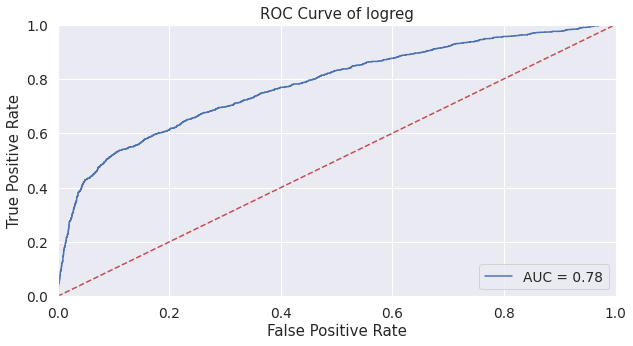

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of logreg')
plt.grid(True)
plt.show()

In [ ]:
cat_model_new = CatBoostClassifier (random_state = 42, eval_metric = 'AUC')
cat_model_new.fit(X_train, y_train, early_stopping_rounds = 100, eval_set = [(X_test,y_test)])
pred_cat_new = cat_model_new.predict(X_test)

In [ ]:
print("Test Accuracy: ",metrics.accuracy_score(y_test, pred_cat_new))

0.78 meilleur AOC


### Xgboost

In [ ]:
!pip3 install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
   param_grid = {
        "objective": "binary:logistic",
        "eval_metric":'auc', # specify eval metric for xgboost
        "scale_pos_weight":2.614678899082569,
        'colsample_bytree':0.5,
        'subsample':0.9,
        'learning_rate':0.09829528399857788,        
        'max_depth':6,
        'min_child_weight':10}

In [ ]:
par={'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.3}

In [ ]:
#SEED=42
#NSPLITS = 5
#SHUFFLE =True
xgb = xgb.XGBClassifier(**par)

In [ ]:
 xgb.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
              verbose=100,
              early_stopping_rounds=50)

In [ ]:
xgb.fit(X_train,y_train)
print("Score du modèle : %.2f" % xgb.score(X_test, y_test))
y_pred5 = xgb.predict(X_test)

In [ ]:
plot_confusion_matrix(xgb,X_test,y_test)
print(classification_report(y_test,y_pred5,digits=6))

In [ ]:
y_score=xgb.predict_proba(X_test)
print(y_score)
fpr,tpr,theshold=roc_curve(y_test,y_score[:,1]) #: => toutes les lignes / theshold= seuil /fpr et tpr= false/true positive rate
roc_auc=auc(fpr,tpr)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of logreg')
plt.grid(True)
plt.show()

### GradientBoosting

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=80, max_depth= 15, min_samples_split= 1000, min_samples_leaf=30,subsample=0.9,max_features=7)
gbc.fit(X_train, y_train)

In [ ]:
y_pred7=gbc.predict(X_test)

In [ ]:
test = model_fit_reports(algo =gbc ,X_ = X_test,y_ = y_test, performCV=True, printFeatureImportance=False, cv_folds=5)

In [ ]:
# courbe roc et auc
y_score=SVM_Model.predict_proba(X_test)
print(y_score)
fpr,tpr,theshold=roc_curve(y_test,y_score[:,1]) #: => toutes les lignes / theshold= seuil /fpr et tpr= false/true positive rate
roc_auc=auc(fpr,tpr)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of logreg')
plt.grid(True)
plt.show()

##Evaluation

In [ ]:
import plotly.figure_factory as ff 

In [ ]:
dic = {'Model':['Logistic regression','Random forest','AdaBoost','CatBoost','xgboost','Gradient Boost','Decision Tree'],
       'Accuracy':[0.80,0.85,0.84,0.85,0.84,0.84,0.75],
       'AUC-ROC Score':[0.65,0.67,0.77,0.78,0.76,0.67,0.63]}
score_df = pd.DataFrame(dic)
fig =  ff.create_table(score_df)
fig.show()

=> D'aprés le tableau ci-dessus, le score le plus élevé (0.85) appartient à Random Forest et CatBoost, et l'AUC le plus élevé appartient à CatBoost.

=> Ce qui rend Catboost l'algorithme le plus approprié